# Binary FastText Embedding Creation

In [1]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.tokenize import word_tokenize
from gensim.models import FastText, KeyedVectors
from gensim.models.word2vec import LineSentence
import pandas as pd
import numpy as np

def corpus_analysis(corpus):
    frequency = Counter()
    with open(corpus, 'r', encoding='utf-8') as file:
        for line in file:
            tokens = word_tokenize(line)
            frequency.update(tokens)

    # Obtain frequency values and order them from higher to lower
    freq_values = list(frequency.values())
    freq_values_sorted = sorted(freq_values, reverse=True)

    # Frequency distribution of words
    plt.figure(figsize=(10, 6))
    plt.loglog(freq_values_sorted)  
    plt.title('Log-Log plot of words frequency')
    plt.xlabel('Word rank')
    plt.ylabel('Frequency')
    plt.show()

    # Count words only appearing once
    words_with_one_occurrence = sum(1 for count in frequency.values() if count == 1)

    # Count wordsa that appear twice
    words_with_min_count_2 = sum(1 for count in frequency.values() if count >= 2)

    print("Words that appear only once:", words_with_one_occurrence)
    print("Original vocabulary dimention:", len(frequency))
    print("Vocabulary dimention if we set min_count=2:", words_with_min_count_2)
    

In [2]:
def fasttext_training(corpus, min_count = 1):

    lee_data = LineSentence(corpus)
    # The number of words decreases drastically if we change min_count even slightly (from 1 to 2, from 30k to 14k tokens)
    # We leave it at 1 because we want to see how LSTM behaves if it has an embedding for each word (without OOV words), even if the quality of embeddings is lower
    # Window = 5 (avg lenght of tweet is not much higher)
    # sg = 1 we use skipgram
    # epochs = 5 default
    # min_n = 1 because there might also be very short words, of two characters
    model = FastText(min_count = min_count, vector_size = 100, window = 5, sg = 1, epochs = 5, min_n = 1)

    # Build the vocabulary
    model.build_vocab(lee_data)
    len_vocab = len(model.wv)
    tot_sentences = model.corpus_count

    # Train the model
    model.train(lee_data, total_examples = tot_sentences, total_words = len_vocab, epochs = model.epochs)

    wv = model.wv

    return wv 
    

In [3]:
def model_evaluation(model):
    print("Is night in the vocabulary?")
    print('night' in model.key_to_index)
    print()

    print("Is nights in the vocabulary?")
    print('nights' in model.key_to_index)
    print()

    print("Similarity between nigth and nights:")
    print(model.similarity("night", "nights"))
    print()

    print("Is dog in the vocabulary?")
    print('dog' in model.key_to_index)
    print()

    print("Most similar words to dog:")
    print(model.most_similar("dog"))
    print()


    print("Is brothers in the vocabulary?")
    print('brothers' in model.key_to_index)
    print()

    print("Most similar words to brothers:")
    print(model.most_similar("brothers"))
    print()

    print("Similarity between sushi shop and japanese restaurant:")
    print(model.n_similarity(['sushi', 'shop'], ['japanese', 'restaurant']))
    print()


In [4]:
def qw_acc(model):
    fasttext_wAp_analogy = model.evaluate_word_analogies('questions-words.txt')

    # Extracting the accuracy and category results
    total_accuracy = fasttext_wAp_analogy[0]
    category_results = fasttext_wAp_analogy[1]

    # Processing the data
    sections = []
    accuracies = []
    total_correct = 0
    total_incorrect = 0

    for entry in category_results:
        section = entry['section']
        correct = len(entry['correct'])
        incorrect = len(entry['incorrect'])
        total = correct + incorrect
        accuracy = correct / total if total > 0 else 0
        sections.append(section)
        accuracies.append(accuracy)
        total_correct += correct
        total_incorrect += incorrect

    # Total accuracy
    total_accuracy = total_correct / (total_correct + total_incorrect)

    # Creating DataFrame
    df = pd.DataFrame({
        'Section': sections,
        'Accuracy': accuracies
    })

    print("Accuracy per Section:")
    print(df)

In [5]:
#Txt file creation for both dataset (already in the folder, no need to run it)
df = pd.read_csv('../../../data/New dataset/LSTM/no_preprocessing/train_tweets_LSTM_no_new_binary.csv')
df['tweet_text'].to_csv('text_data_no_bin.txt', index=False, header=False)

df = pd.read_csv('../../../data/New dataset/LSTM/preprocessing/train_tweets_LSTM_pre_new_binary.csv')
df['tweet_text'].to_csv('text_data_pre_bin.txt', index=False, header=False)

## Corpus Analysis

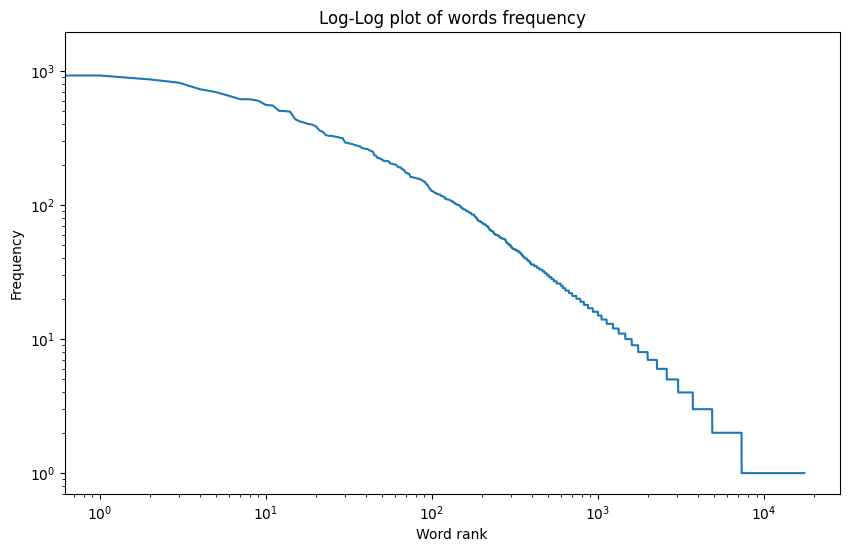

Words that appear only once: 10157
Original vocabulary dimention: 17472
Vocabulary dimention if we set min_count=2: 7315


In [6]:
corpus_analysis('text_data_no_bin.txt')

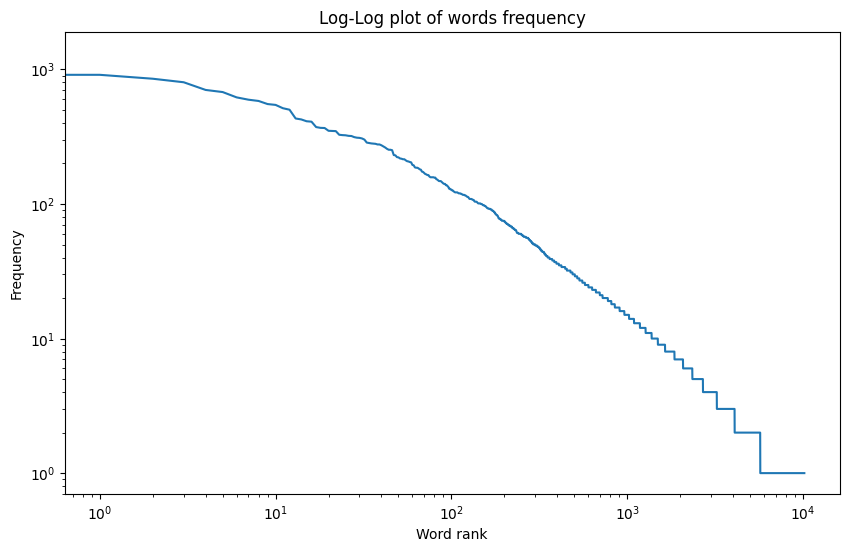

Words that appear only once: 4469
Original vocabulary dimention: 10175
Vocabulary dimention if we set min_count=2: 5706


In [7]:
corpus_analysis('text_data_pre_bin.txt')

## Model Training

In [8]:
model1 = fasttext_training('text_data_no_bin.txt')

In [9]:
model2 = fasttext_training('text_data_pre_bin.txt')

## Model Evaluation

### General similarity tests 

In [10]:
model_evaluation(model1)

Is night in the vocabulary?
True

Is nights in the vocabulary?
True

Similarity between nigth and nights:
0.9840889

Is dog in the vocabulary?
True

Most similar words to dog:
[('doug', 0.9991192817687988), ('dawg', 0.9978917837142944), ('yov', 0.9967654943466187), ('omgosh', 0.9967092871665955), ('fox', 0.9966763854026794), ('xbox', 0.9966602921485901), ('gotcha', 0.9965842366218567), ('odb', 0.9965735673904419), ('goddamn', 0.9964669346809387), ('128514', 0.9963899254798889)]

Is brothers in the vocabulary?
True

Most similar words to brothers:
[('foster', 0.9995064735412598), ('harassmentthreats', 0.9994651079177856), ('worlds', 0.9993655681610107), ('research', 0.999226987361908), ('retards', 0.9991983771324158), ('jetstar', 0.9991782903671265), ('spatchies', 0.9991735816001892), ('breasts', 0.999140202999115), ('looters', 0.9991125464439392), ('bystanders', 0.9991108179092407)]

Similarity between sushi shop and japanese restaurant:
0.9897259



In [11]:
model_evaluation(model2)

Is night in the vocabulary?
True

Is nights in the vocabulary?
True

Similarity between nigth and nights:
0.98813415

Is dog in the vocabulary?
True

Most similar words to dog:
[('fog', 0.9936893582344055), ('13', 0.9922298192977905), ('115', 0.9916675090789795), ('11', 0.9916617274284363), ('15', 0.9913850426673889), ('52', 0.9912787079811096), ('175', 0.9912171959877014), ('155', 0.991155207157135), ('12', 0.9910576939582825), ('17', 0.9910504817962646)]

Is brothers in the vocabulary?
False

Most similar words to brothers:
[('brother', 0.9991603493690491), ('crackers', 0.9985184073448181), ('forgiveness', 0.9984504580497742), ('assured', 0.9981542229652405), ('sovereign', 0.9979348182678223), ('assertive', 0.997904360294342), ('rogers', 0.9977561235427856), ('syrup', 0.9976844787597656), ('superb', 0.9976609349250793), ('signer', 0.9975934624671936)]

Similarity between sushi shop and japanese restaurant:
0.98020226



### Question-words test

In [12]:
qw_acc(model1)

Accuracy per Section:
                        Section  Accuracy
0      capital-common-countries  0.000000
1                 capital-world  0.000000
2                      currency  0.000000
3                 city-in-state  0.000000
4                        family  0.015152
5     gram1-adjective-to-adverb  0.075163
6                gram2-opposite  0.157143
7             gram3-comparative  0.033333
8             gram4-superlative  0.000000
9      gram5-present-participle  0.011858
10  gram6-nationality-adjective  0.016260
11             gram7-past-tense  0.022487
12                 gram8-plural  0.109687
13           gram9-plural-verbs  0.133987
14               Total accuracy  0.054361


In [13]:
qw_acc(model2)

Accuracy per Section:
                        Section  Accuracy
0      capital-common-countries  0.000000
1                 capital-world  0.000000
2                      currency  0.000000
3                 city-in-state  0.000000
4                        family  0.000000
5     gram1-adjective-to-adverb  0.168421
6                gram2-opposite  0.285714
7             gram3-comparative  0.091667
8             gram4-superlative  0.000000
9      gram5-present-participle  0.052632
10  gram6-nationality-adjective  0.055556
11             gram7-past-tense  0.010526
12                 gram8-plural  0.066667
13           gram9-plural-verbs  0.166667
14               Total accuracy  0.083229


Saving the models

In [14]:
# Salva i vettori FastText
model1.save("BIN_fasttext_model_no.bin")
model2.save("BIN_fasttext_model_pre.bin")

Create embedding matrix

In [15]:

def create_embedding_matrix(wv_path, bool = 1):
    try:
        wv = KeyedVectors.load(wv_path)
        print("VWords vectors successfully uploaded")
    except FileNotFoundError:
        print(f"Error: wrong path")
        exit()

    vocab = list(wv.key_to_index.keys())

    vector_size = wv.vector_size

    embedding_matrix = np.zeros((len(vocab) + 1, vector_size))

    for i, word in enumerate(vocab):
        embedding_matrix[i] = wv[word]

    if bool == 1:
        embedding_matrix_path = "BIN_fasttext_embeddingmatrix_pre.npy"
    else:
        embedding_matrix_path = "BIN_fasttext_embeddingmatrix_no.npy"
    
    np.save(embedding_matrix_path, embedding_matrix)

In [16]:
create_embedding_matrix('BIN_fasttext_model_no.bin', 0)
create_embedding_matrix('BIN_fasttext_model_pre.bin', 1)

VWords vectors successfully uploaded
VWords vectors successfully uploaded
